In [14]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## AdalineGD implementation

In [16]:
class AdalineGD:
    """ADAptive Linear Neuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    losses_ : list
      Mean squared eror loss function values in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        '''
        Parameters
            loc
            float or array_like of floats
            Mean (“centre”) of the distribution.
            
            scale
            float or array_like of floats
            Standard deviation (spread or “width”) of the distribution. Must be non-negative.
            
            size
            int or tuple of ints, optional
            Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. 
            If size is None (default), a single value is returned if loc and scale are both scalars. 
            Otherwise, np.broadcast(loc, scale).size samples are drawn.
        '''
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.losses_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
                        
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

## SGD implementation

In [9]:
class AdalineSGD:
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float64(0.)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

## Mini-Batch implementation

In [10]:
class AdalineMiniBatch:
    def __init__(self, eta=0.01, n_iter=10, batch_size=32, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        # Initializing weights
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.)
        self.w_initialized = True
        self.losses_ = []

        for k in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)

            losses = []
            for start_idx in range(0, X.shape[0], self.batch_size):
                end_idx = start_idx + self.batch_size
                X_batch = X[start_idx:end_idx]
                y_batch = y[start_idx:end_idx]

                output = self.activation(self.net_input(X_batch))
                errors = (y_batch - output)

                self.w_ += self.eta * 2.0 * X_batch.T.dot(errors) / X_batch.shape[0]
                self.b_ += self.eta * 2.0 * errors.mean()

                losses.append((errors**2).mean())

            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]


## Feature engineering

In [11]:

df = pd.read_csv("iris.csv")

y = df.iloc[0:100, 4].values 
y = np.where(y == 'Iris-setosa', 0, 1)

# Extracting sepal length (column 0) and petal length (column 2)
X = df.iloc[0:100, [0, 2]].values

# Standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada_gd = AdalineGD(n_iter=15, eta=0.5)
ada_sgd = AdalineSGD(eta=0.01, n_iter=15, shuffle=True, random_state=1)
ada_mb  = AdalineMiniBatch(eta=0.01, n_iter=15, batch_size=8, shuffle=True, random_state=1)

ada_gd.fit(X_std, y)
ada_sgd.fit(X_std, y)
ada_mb.fit(X_std, y)

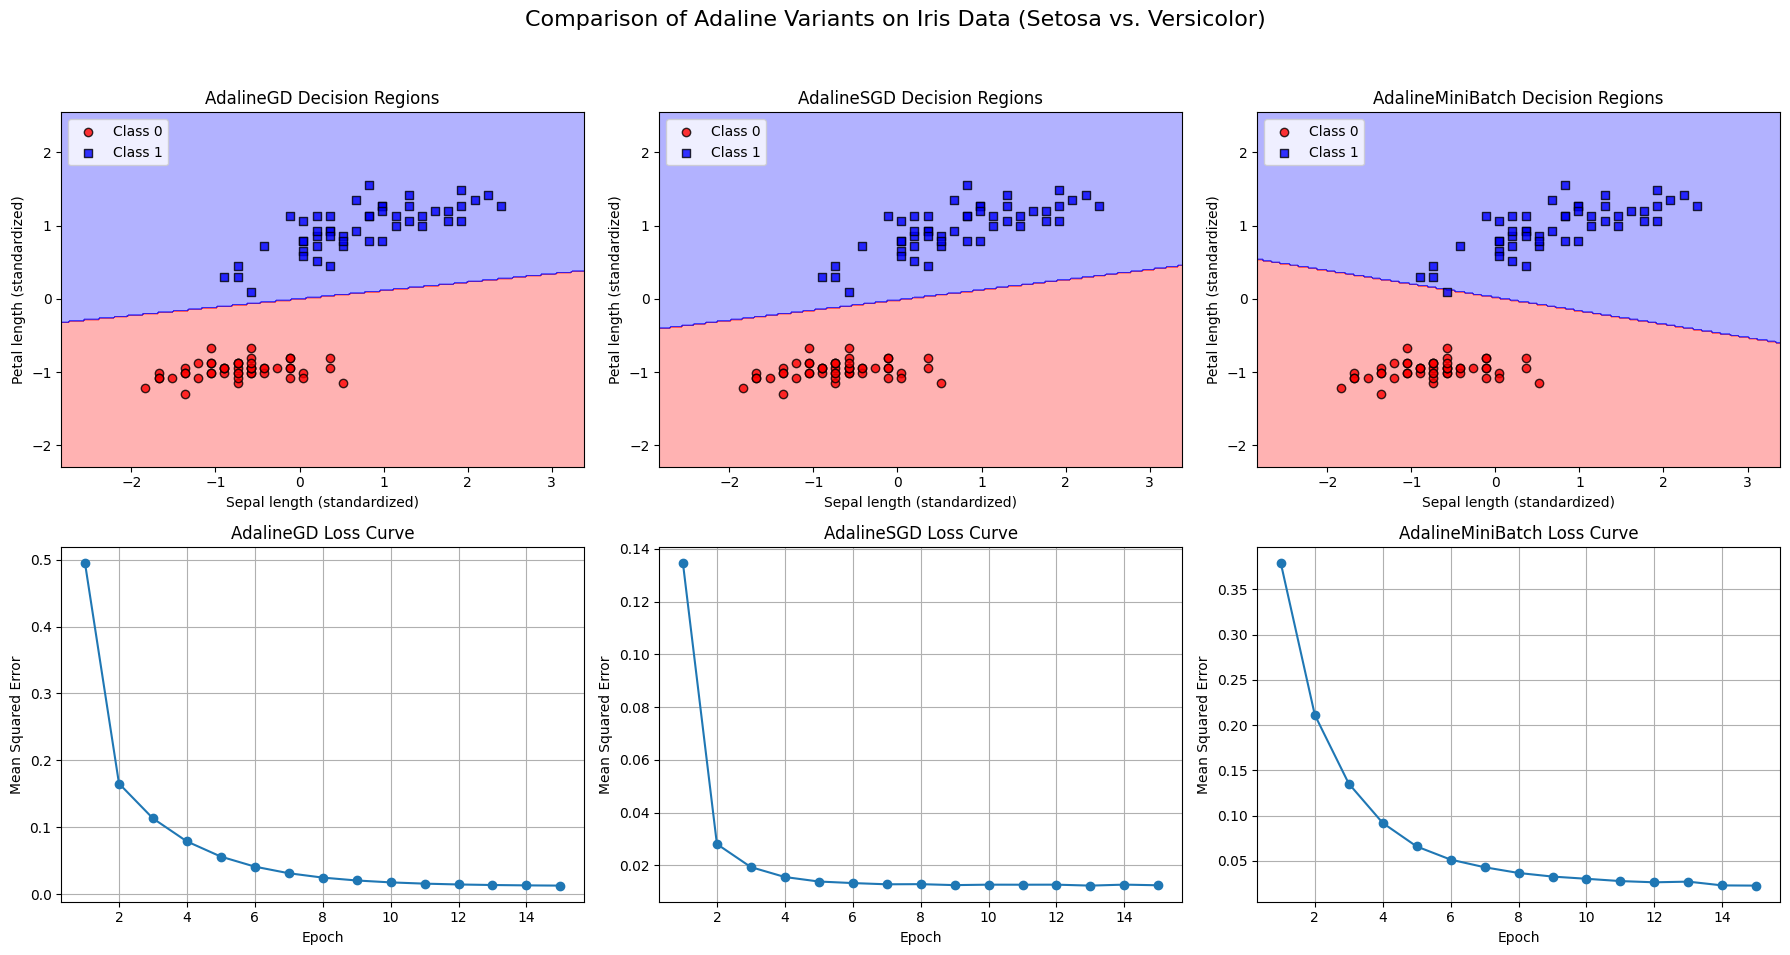

In [12]:
def plot_decision_regions(ax, X, y, classifier, resolution=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], 
                   y=X[y == cl, 1],
                   alpha=0.8, 
                   c=colors[idx],
                   marker=markers[idx], 
                   label=f"Class {cl}",
                   edgecolor='black')

# --- Plotting in a 2x3 Grid ---
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Comparison of Adaline Variants on Iris Data (Setosa vs. Versicolor)", fontsize=16)

classifiers = [("AdalineGD", ada_gd), 
               ("AdalineSGD", ada_sgd), 
               ("AdalineMiniBatch", ada_mb)]

for i, (name, clf) in enumerate(classifiers):
    ax = axs[0, i]
    plot_decision_regions(ax, X_std, y, classifier=clf)
    ax.set_title(f"{name} Decision Regions")
    ax.set_xlabel("Sepal length (standardized)")
    ax.set_ylabel("Petal length (standardized)")
    ax.legend(loc='upper left')

for i, (name, clf) in enumerate(classifiers):
    ax = axs[1, i]
    ax.plot(range(1, len(clf.losses_) + 1), clf.losses_, marker='o')
    ax.set_title(f"{name} Loss Curve")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Mean Squared Error")
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


All 3 models do great job at classification. 

AdalineGD with a higher learning rate (0.5) converges smoothly and rapidly, showing a steep initial drop in MSE. As we know, its computationally expensive solution though.

AdalineSGD converges quicker since it does weight updates after every row, but only drawback is that we do updates for every data point which is risky in case we have financial data (cannot be shuffled) and me might not be able to generilze model well

AdalineMiniBatch has a balance between the two, producing a stable learning curve while still converging efficiently.